# Augmentation

Augmentation for MRI has its limitaions, as 

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2S

import functions
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(18)

In [75]:
from tensorflow import cast, image, numpy_function

In [ ]:
# ImageDataGenerator
datagen = ImageDataGenerator(
        shear_range=0.2,
        brightness_range=[0.2,1.2],
        horizontal_flip=True,
        validation_split=0.20) # brightness

In [ ]:
al_train_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18 # to make the result reproducible
                  )

al_val_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="grayscale", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(al_train_dg)[0].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')

In [87]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(208, 176, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_dg, validation_data = al_val_dg, steps_per_epoch=len(al_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
160/160 [==============================] - 12s 72ms/step - loss: 1.1216 - accuracy: 0.4720 - val_loss: 1.0443 - val_accuracy: 0.5005
Epoch 2/50
160/160 [==============================] - 11s 71ms/step - loss: 1.0283 - accuracy: 0.5714 - val_loss: 1.0826 - val_accuracy: 0.5005
Epoch 3/50
160/160 [==============================] - 11s 69ms/step - loss: 0.9598 - accuracy: 0.5155 - val_loss: 1.0484 - val_accuracy: 0.5005
Epoch 4/50
160/160 [==============================] - 10s 62ms/step - loss: 1.1345 - accuracy: 0.5280 - val_loss: 1.0742 - val_accuracy: 0.5005
Epoch 5/50
160/160 [==============================] - 16s 101ms/step - loss: 0.8935 - accuracy: 0.5714 - val_loss: 1.1021 - val_accuracy: 0.5005
Epoch 6/50
160/160 [==============================] - 19s 120ms/step - loss: 1.0881 - accuracy: 0.4658 - val_loss: 1.0977 - val_accuracy: 0.5005


In [65]:
# ImageDataGenerator
datagen = ImageDataGenerator(
        rescale=1. / 255,
        zoom_range=0.2, # zoom
        shear_range=0.2,
        brightness_range=[0.2,1.2],
        horizontal_flip=True,
        validation_split=0.20) # brightness

Found 4100 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


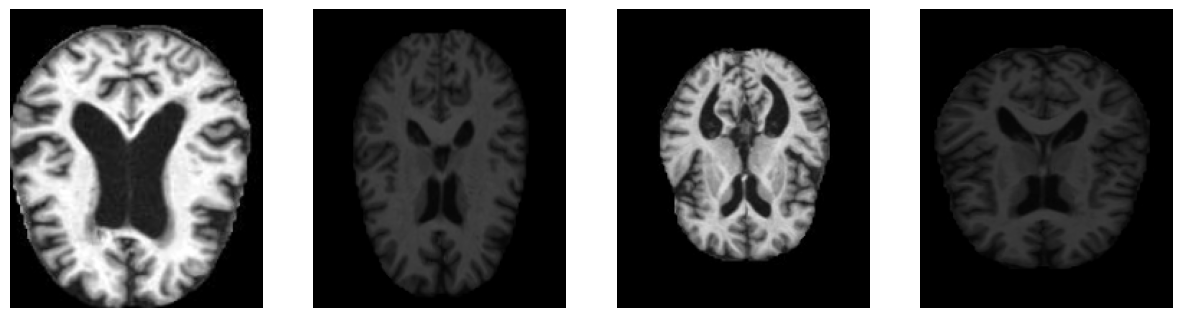

In [57]:
al_train_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='training'
                  )

al_val_dg = datagen.flow_from_directory(
                  directory='../data/alzheimer/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )



fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(al_train_dg)[0].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image)
    ax[i].axis('off')

In [58]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(208, 176, 3)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_dg, validation_data = al_val_dg, steps_per_epoch=len(al_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
128/128 [==============================] - 13s 95ms/step - loss: 1.0846 - accuracy: 0.4186 - val_loss: 1.0723 - val_accuracy: 0.5005
Epoch 2/50
128/128 [==============================] - 13s 100ms/step - loss: 1.1496 - accuracy: 0.4729 - val_loss: 1.0922 - val_accuracy: 0.3539
Epoch 3/50
128/128 [==============================] - 12s 98ms/step - loss: 1.0617 - accuracy: 0.4186 - val_loss: 1.0453 - val_accuracy: 0.5005
Epoch 4/50
128/128 [==============================] - 12s 95ms/step - loss: 1.0164 - accuracy: 0.4884 - val_loss: 1.0778 - val_accuracy: 0.5005
Epoch 5/50
128/128 [==============================] - 12s 93ms/step - loss: 1.1529 - accuracy: 0.3798 - val_loss: 1.0751 - val_accuracy: 0.5005
Epoch 6/50
128/128 [==============================] - 12s 93ms/step - loss: 1.0660 - accuracy: 0.5039 - val_loss: 1.0724 - val_accuracy: 0.5005
Epoch 7/50
128/128 [==============================] - 12s 97ms/step - loss: 1.0835 - accuracy: 0.5116 - val_loss: 1.0411 - val_accuracy

KeyboardInterrupt: 

Found 2298 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


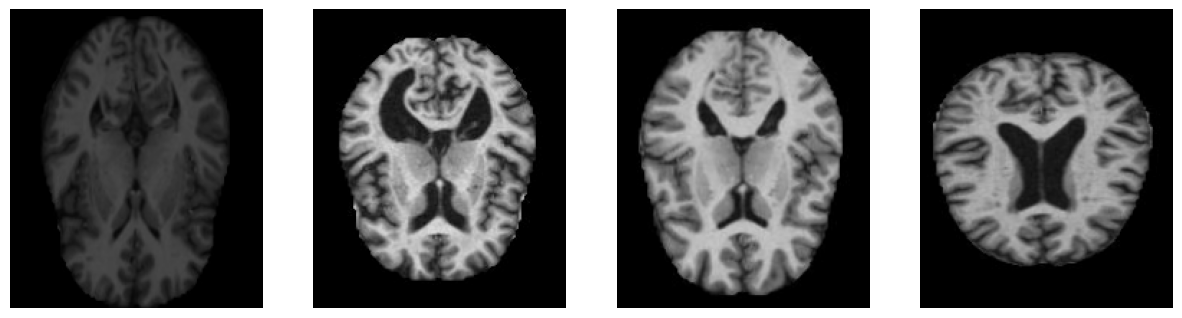

In [67]:
bt_train_dg = datagen.flow_from_directory(
                  directory='../data/brain_tumor/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='training'
                  )

bt_val_dg = datagen.flow_from_directory(
                  directory='../data/brain_tumor/train',
                  target_size=(208, 176), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=18,
                  shuffle=True,
                  subset='validation'
                  )



fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
    # convert to unsigned integers for plotting
    image = next(al_train_dg)[0].astype('uint8')

    # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)

    # plot raw pixel data
    ax[i].imshow(image)
    ax[i].axis('off')

In [61]:
effnet = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=(208, 176, 3),
    classes=4,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [62]:
# Freeze last 5 layers
for layer in effnet.layers[:-5]:
    layer.trainable = False

In [68]:
es = EarlyStopping(patience = 5)

model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(bt_train_dg, validation_data = bt_val_dg, steps_per_epoch=len(bt_train_dg)/32,epochs=50, callbacks = [es])

Epoch 1/50
71/71 [==============================] - 91s 1s/step - loss: 1.4395 - accuracy: 0.3056 - val_loss: 1.3827 - val_accuracy: 0.2496
Epoch 2/50
71/71 [==============================] - 83s 1s/step - loss: 1.3763 - accuracy: 0.3056 - val_loss: 1.3937 - val_accuracy: 0.3613
Epoch 3/50
71/71 [==============================] - 80s 1s/step - loss: 1.3599 - accuracy: 0.3194 - val_loss: 1.3596 - val_accuracy: 0.3246
Epoch 4/50
71/71 [==============================] - 83s 1s/step - loss: 1.2758 - accuracy: 0.3333 - val_loss: 1.4586 - val_accuracy: 0.3159
Epoch 5/50
71/71 [==============================] - 80s 1s/step - loss: 1.3050 - accuracy: 0.3333 - val_loss: 1.5138 - val_accuracy: 0.3438
Epoch 6/50
72/71 [==============================] - ETA: 0s - loss: 1.3431 - accuracy: 0.3333

KeyboardInterrupt: 

In [33]:
effnet = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=(208, 176, 3),
    classes=4,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [34]:
# Freeze last 5 layers
for layer in effnet.layers[:-5]:
    layer.trainable = False

In [40]:
es = EarlyStopping(patience = 5)

model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(al_train_dg, validation_data = al_val_dg, steps_per_epoch=len(al_train_dg) / 32, epochs=50, callbacks = [es])

Epoch 1/50
128/128 [==============================] - 98s 698ms/step - loss: 1.1431 - accuracy: 0.4419 - val_loss: 1.4205 - val_accuracy: 0.2815
Epoch 2/50
128/128 [==============================] - 84s 662ms/step - loss: 0.9798 - accuracy: 0.5116 - val_loss: 1.7330 - val_accuracy: 0.2854
Epoch 3/50
128/128 [==============================] - 86s 677ms/step - loss: 0.9853 - accuracy: 0.5504 - val_loss: 1.8659 - val_accuracy: 0.3167
Epoch 4/50
129/128 [==============================] - ETA: 0s - loss: 1.0044 - accuracy: 0.5504

KeyboardInterrupt: 

In [4]:
al_train_ds, al_val_ds = image_dataset_from_directory(
    '../data/alzheimer/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(208, 176),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 5123 files belonging to 4 classes.
Using 4099 files for training.
Using 1024 files for validation.
